In [1]:
def exceptional(n):
    # Returns the exceptional Cartan matrix E_n, for n >= 5
    if n < 5:
        raise ValueError("Matrix E_n only makes sense for n >= 5")
    M = []
    for i in range(n):
        row = []
        for j in range(n):
            if i == j:
                row.append(2)
            elif (i == j + 1) or (j == i + 1):
                row.append(-1)
            elif ((i == n - 1) and (j == 2)) or ((j == n - 1) and (i == 2)):
                row.append(-1)
            else:
                row.append(0)
        M.append(row)
    M[n-1][n-2] = 0
    M[n-2][n-1] = 0
    return CartanMatrix(M)

In [2]:
class root(tuple):
    """
    The class for roots of a Kac-Moody algebra.
    """
    def __init__(self, list_form):
        self.list_form    = list(list_form)
        self.vector_form  = vector(list_form)
        self.tuple_form   = tuple(list_form)
        #self.coding       = prime_code(list_form)
    def __str__(self):
        return str(self.list_form)
    def __repr__(self):
        return str(self.list_form)
    #def __eq__(left, right):
    #    return left.coding == right.coding
    def __le__(left,right):
        return all(l <= r for l, r in zip(left.list_form, right.list_form))
    def __lt__(left,right):
        return all(l <= r for l, r in zip(left.list_form, right.list_form)) and not left == right
    def height(self):
        return sum(self.list_form)
#     def set_multiplicity(self, kma, m):
#         kma.multiplicities[self.coding] = m
#     def multiplicity(self, kma):
#         return kma.multiplicities[self.coding]
#     def set_c(self, kma, c):
#         kma.cs[self.coding] = c
#     def c(self, kma):
#         return kma.cs[self.coding] # REplace
    def __mul__(self,other):
        return self.vector_form * other
    def __rmul__(self,other):
        return other*self.vector_form
    def __sub__(self,other):
        return self.vector_form - other
    def __rsub__(self,other):
        return other - self.vector_form

In [3]:
class KacMoodyAlgebra():
    """
    The class for CartanMatrices decorated with more information.
    """
    def __init__(self, matrix, height=30):
        self.matrix = CartanMatrix(matrix)
        self.height = height
        self.dim = self.matrix.nrows()
        self.simple_roots = [root(tuple([int(a == b) for a in range(self.dim)])) for b in range(self.dim)]
        #self.roots = AVLTree()
        self.roots = set(self.simple_roots)
        self.multiplicities = dict()
        self.cs = dict()
        self.zero_root = root(tuple([0] * self.dim))
        for s in self.simple_roots:
            #s.set_multiplicity(self, 1)
            #s.set_c(self, 1)
            self.multiplicities[s] = 1
            self.cs[s] = 1
        self.pingpong(self.simple_roots) # Generate real roots
        
        #Now, figure out the imag
        self.imag_basis = [root(-list(x)) for x in Cone(matrix).dual().Hilbert_basis()]
        
        

    def B(self, a, b):
        """
        Returns the bilinear product induced by self - does this work for nonsymmetric?
        """
        return a * self.matrix * b

    def weyl(self, r, s):
        """
        Acts the Weyl group representation of the simple root s on the root r r
        """
        return root(r - self.B(r, s) * s)

    def pingpong(self, generators):
        """
        Adjoin all the roots, that can be obtained
        by acting the Weyl group on the generators, up to height
        """
        #self.roots.insert_list(generators)
        for g in generators:
            to_pingpong = [g]
            #mult = g.multiplicity(self)
            mult = self.multiplicities[g]
            while len(to_pingpong) != 0:
                next_root    = to_pingpong.pop()
                ponged       = [self.weyl(    next_root, s) for s in self.simple_roots]
                qonged       = [p for p in ponged if p.height() <= self.height and not p in self.roots and self.zero_root <= p]
                #below is test for f.d. case
                #qonged       = [p for p in ponged if p.height() <= self.height and not p in self.roots]
                to_pingpong += qonged
                for p in qonged:
                    #p.set_multiplicity(self, mult)
                    self.multiplicities[p] = mult
                    self.roots.add(p)
                    
    def graded_ascent(self):
        """
        """
    
    

In [14]:
hb = Cone(exceptional(10)).dual().Hilbert_basis()

In [21]:
tuple(-list(hb)[0])

(4, 9, 14, 12, 10, 8, 6, 4, 2, 7)

In [9]:
exceptional(10)

[ 2 -1  0  0  0  0  0  0  0  0]
[-1  2 -1  0  0  0  0  0  0  0]
[ 0 -1  2 -1  0  0  0  0  0 -1]
[ 0  0 -1  2 -1  0  0  0  0  0]
[ 0  0  0 -1  2 -1  0  0  0  0]
[ 0  0  0  0 -1  2 -1  0  0  0]
[ 0  0  0  0  0 -1  2 -1  0  0]
[ 0  0  0  0  0  0 -1  2 -1  0]
[ 0  0  0  0  0  0  0 -1  2  0]
[ 0  0 -1  0  0  0  0  0  0  2]

In [6]:
polymake

Polymake

In [160]:
sage.interfaces.polymake.Polymake(script_subdirectory='/Applications/polymake.app/Contents/MacOS')

Polymake

In [154]:
polymake

Polymake

In [161]:
polymake.cube(2)

TypeError: unable to start polymake: End Of File (EOF). Empty string style platform.
Polymake with PID 93205 running /usr/bin/env TERM=dumb polymake
command: /usr/bin/env
args: ['/usr/bin/env', 'TERM=dumb', 'polymake']
buffer (last 100 chars): ''
before (last 100 chars): 'env: polymake: No such file or directory\r\n'
after: <class 'pexpect.exceptions.EOF'>
match: None
match_index: None
exitstatus: None
flag_eof: True
pid: 93205
child_fd: 66
closed: False
timeout: None
delimiter: <class 'pexpect.exceptions.EOF'>
logfile: None
logfile_read: None
logfile_send: None
maxread: 4194304
ignorecase: False
searchwindowsize: None
delaybeforesend: None
delayafterclose: 0.1
delayafterterminate: 0.1
searcher: searcher_re:
    0: re.compile('polytope > ')

In [163]:
for p in sys.path:
    print(p)


/Applications/SageMath/local/lib/python27.zip
/Applications/SageMath/local/lib/python2.7
/Applications/SageMath/local/lib/python2.7/plat-darwin
/Applications/SageMath/local/lib/python2.7/plat-mac
/Applications/SageMath/local/lib/python2.7/plat-mac/lib-scriptpackages
/Applications/SageMath/local/lib/python2.7/lib-tk
/Applications/SageMath/local/lib/python2.7/lib-old
/Applications/SageMath/local/lib/python2.7/lib-dynload
/Applications/SageMath/local/lib/python2.7/site-packages
/Applications/SageMath/local/lib/python2.7/site-packages/IPython/extensions
/Users/joshualin/.sage/ipython-5.0.0


In [146]:
start = time.time()
K = KacMoodyAlgebra(exceptional(10),height=100)
end = time.time()
print(end-start)

41.3089790344


In [144]:
start = time.time()
K = KacMoodyAlgebra(exceptional(9),height=100)
end = time.time()
print(end-start)

0.594415903091


In [147]:
from sage.data_structures.mutable_poset import MutablePoset as MP

In [148]:
MP(K.roots)

KeyboardInterrupt: 

In [145]:
len(K.roots)

802

In [139]:
print(K.roots)

set([[0, 0, 0, 0, 1, 0, 0, 0], [1, 2, 2, 2, 2, 1, 0, 1], [1, 1, 1, 1, 1, 1, 0, 1], [1, 2, 3, 2, 1, 1, 1, 1], [1, 1, 2, 1, 0, 0, 0, 1], [2, 4, 6, 5, 4, 2, 1, 3], [0, 1, 1, 1, 1, 1, 1, 0], [0, 1, 2, 1, 1, 0, 0, 1], [2, 4, 5, 4, 3, 2, 1, 2], [1, 1, 1, 0, 0, 0, 0, 1], [1, 3, 4, 3, 2, 2, 1, 2], [1, 1, 1, 1, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1], [2, 4, 6, 4, 3, 2, 1, 3], [1, 2, 3, 3, 2, 1, 1, 1], [0, 1, 2, 2, 1, 1, 0, 1], [1, 1, 2, 1, 1, 0, 0, 1], [1, 2, 3, 2, 1, 0, 0, 2], [0, 0, 0, 0, 1, 1, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0], [1, 2, 3, 2, 1, 1, 0, 1], [0, 0, 1, 1, 1, 1, 0, 1], [1, 2, 2, 1, 1, 0, 0, 1], [2, 3, 5, 4, 3, 2, 1, 2], [1, 2, 3, 3, 2, 2, 1, 1], [1, 1, 2, 2, 2, 1, 0, 1], [0, 0, 0, 1, 1, 0, 0, 0], [1, 2, 3, 2, 2, 1, 0, 2], [0, 1, 2, 1, 1, 1, 1, 1], [1, 2, 3, 3, 2, 1, 0, 1], [1, 2, 3, 3, 3, 2, 1, 1], [0, 1, 2, 2, 1, 1, 1, 1], [1, 1, 2, 2, 2, 1, 1, 1], [0, 0, 1, 1, 1, 1, 1, 1], [1, 2, 2, 1, 0, 0, 0, 1], [1, 1, 1, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 0], [1, 3, 4, 3, 3, 2, 1, 2], [2, 4, 

In [20]:
#from pytrees import AVLTree

CartanMatrix.multiplicities = dict()
CartanMatrix.cs = dict()

"""
AUXILIARY METHODS FOR AVL TREES
move to another file maybe?
"""
def as_list(self):
	"""
	Turns an AVLTree into a list, in the order that the entries appear
	in the AVLTree.
	"""
	l = []
	def asListHelper(node):
		if node is None:
			return []
		return asListHelper(node.left) + [node.val] + asListHelper(node.right)

	return asListHelper(self.root)
AVLTree.as_list = as_list

def insert_list(self, l):
	"""
	Adds a list into an AVLTree.
	"""
	for x in l:
		self.insert(x)
AVLTree.insert_list = insert_list

"""
OTHER AUXILIARY METHODS
"""
def prime_code(list_form):
	"""
	Encode a list of integers as an integer using a "Godel code"
	by prime numbers.
	"""
	P = Primes()
	c = 1
	for i in range(len(list_form)):
		c *= P.unrank(i)^list_form[i]
	return c

class root(tuple):
    """
    The class for roots of a Kac-Moody algebra.
    """
    #def __init__(self,list_form,multiplicity,c,subroots=None):
    def __init__(self, list_form):
        self.list_form    = list(list_form)
        self.vector_form  = vector(list_form)
        self.tuple_form   = tuple(list_form)
        self.coding       = prime_code(list_form)
    def __str__(self):
        return str(self.list_form)
    def __repr__(self):
        return str(self.list_form)
    def __eq__(left, right):
    	return left.coding == right.coding
    def __le__(left,right):
        return all(l <= r for l, r in zip(left.list_form, right.list_form))
    def __lt__(left,right):
        return all(l <= r for l, r in zip(left.list_form, right.list_form)) and not left.coding == right.coding
    def height(self):
        return sum(self.list_form)
    def set_multiplicity(self, mat, m):
    	mat.multiplicities[self.coding] = m
    def multiplicity(self, mat):
    	return mat.multiplicities[self.coding]
    def set_c(self, mat, c):
    	mat.cs[self.coding] = c
    def c(self, mat):
    	return mat.cs[self.coding] # REplace

class RootedCartanMatrix(CartanMatrix):
    """
    The class for CartanMatrices decorated with more information.
    """
    def __init__(self, mat, height=30):
        print('ah')
        super().__init__(mat)
        self.height = height
        self.dim = self.nrows()
        self.simple_roots = [root(tuple([int(a == b) for a in range(dim)])) for b in range(dim)]
        self.roots = AVLTree()
        self.zero = root(tuple([0] * self.dim))
        for s in self.simple_roots:
            s.set_multiplicity(self, 1)
            s.set_c(self, 1)
        self.pingpong(self.simple_roots) # Generate real roots

	def B(self, a, b):
		"""
		Returns the bilinear product induced by self - does this work for nonsymmetric?
		"""
		return a * self * b

	def weyl(self, r, s):
		"""
		Acts the Weyl group representation of the simple root s on the root r r
		"""
		return root(r.vector_form - self.B(r.vector_form, s.vector_form) * s.vector_form)

	def pingpong(self, generators):
		"""
		Adjoin all the roots, that can be obtained
		by acting the Weyl group on the generators.
		"""
		self.roots.insert_list(generators)
		for g in generators:
			to_pingpong = [g]
			mult = g.multiplicity(self)
			while len(to_pingpong) != 0:
				next_root    = to_pingpong.pop()
				ponged       = [weyl(self, next_root, s) for s in self.simple_roots]
				qonged       = [p for p in ponged if p.height() <= self.height and not self.roots.search(p) and self.zero < p]
				to_pingpong += qonged
				for p in qonged:
					p.set_multiplicity(self, mult)
					self.roots.insert(p)


def exceptional(n, height=30):
    # Returns the exceptional Cartan matrix E_n, for n >= 5
    if n < 5:
        raise ValueError("Matrix E_n only makes sense for n >= 5")
    M = []
    for i in range(n):
        row = []
        for j in range(n):
            if i == j:
                row.append(2)
            elif (i == j + 1) or (j == i + 1):
                row.append(-1)
            elif ((i == n - 1) and (j == 2)) or ((j == n - 1) and (i == 2)):
                row.append(-1)
            else:
                row.append(0)
        M.append(row)
    M[n-1][n-2] = 0
    M[n-2][n-1] = 0
    print('ahh')
    return RootedCartanMatrix(matrix(M), height)




In [21]:
exceptional(10,height=30)

ahh


TypeError: Cannot convert sage.matrix.matrix_integer_dense.Matrix_integer_dense to sage.structure.parent.Parent

In [26]:
#Lookup time comparison
def random_tuple_generator(n,h):
    """
    generates random tuples of length n and height h
    """
    return tuple([random.random()*h for i in range(n)])

In [47]:
list_times = []
set_times = []

for q in range(30,50,3):
    p = q/10
    big_list = [random_tuple_generator(5,10) for i in range(floor(10**p))]
    big_set = set(big_list)
    to_sample = [big_list[randint(0,floor(10**p)-1)] for i in range(1000)]
    print('ok')
    
    start = time.time()
    for g in to_sample:
        if g in big_list:
            pass
    end = time.time()
    list_times.append(end-start)

    start = time.time()
    for g in to_sample:
        if g in big_set:
            pass
    end = time.time()
    set_times.append(end-start)
        
    print(p)


ok
3
ok
33/10
ok
18/5
ok
39/10
ok
21/5
ok
9/2
ok
24/5


In [49]:
import matplotlib.pyplot as plt

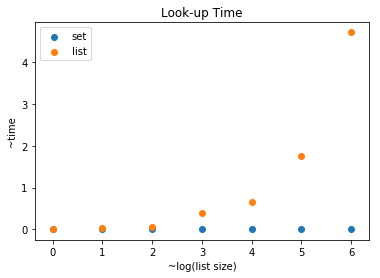

In [54]:
plt.title('Look-up Time')
plt.scatter(range(len(set_times)),set_times,label='set')
plt.scatter(range(len(set_times)),list_times,label='list')
plt.xlabel('~log(list size)')
plt.legend()
plt.ylabel('~time')
plt.show()

In [29]:
import time

start = time.time()
print("hello")
end = time.time()
print(end - start)

hello
0.000241994857788


In [27]:
random_tuple_generator(5,5)

(3.2305378178680098,
 4.84784838363479,
 0.596460048631417,
 2.0553153214479822,
 4.234749785571864)